# Chapter 9. 그래프와 시각화

- 본 책에서는 matplotlib과 matplotlib 기반의 도구들을 우선적으로 살펴봄
- matplotlib은 
    - 주로 2D 그래프를 위한 데스크톱 패키지.
    - 파이썬에서 매트랩과 유사한 인터페이스를 지원하기 위해 2002년 존 헌터가 시작.
    - 그 후 IPython과 matplotlib 커뮤니티의 협력을 통해 IPython 셸(지금은 주피터 노트북)에서 대화형 시각화를 구현해 냄.
    - 모든 운영체제의 다양한 GUI 백엔드를 지원함. 
    - PDF, SVG, JPG, PNG, BMP, GIF 등 일반적으로 널리 사용되는 벡터 포맷과 래스터 포맷으로 그래프 저장 가능. 
- 시간의 흐름에 따라 내부적으로 matplotlib을 사용하는 새로운 데이터 시각화 도구들이 생겨남. 그중 하나가 seaborn 라이브러리.

In [ ]:
# %matplotlib inline

## 9.1 matplotlip API 간략하게 살펴보기

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

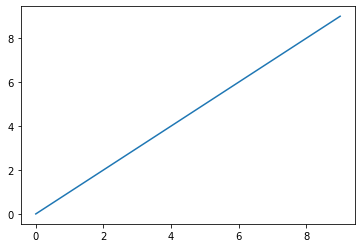

In [3]:
plt.plot(data)

> 함수에서 제공하는 옵션만 사용하는 데 그치지 않고 그 이상의 최적화를 하고 싶다면 matplotlib API도 어느 정도 알고 있어야 한다.

### 9.1.1 figure와 서브플롯
> matplotlib에서 그래프는 Figure 객체 내에 존재한다. 그래프를 위한 새로운 figure(피겨)는 plt.figure를 사용해서 생성할 수 있다.  
> plt.figure에는 다양한 옵션이 있는데 그중 figsize는 파일에 저장할 경우를 위해 만들려는 figure의 크기와 비율을 지정할 수 있다.

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

> 빈 figure로는 그래프를 그릴 수 없다.  
> add_subplot을 사용해서 최소 하나 이상의 subplots를 생성해야 한다.

In [5]:
ax1 = fig.add_subplot(2,2,1)   # figure가 2X2 크기이고 4개의 서브플롯 중에서 첫번재를 선택하겠다는 의미 (서브 플롯은 1부터 숫자가 매겨짐)
ax2 = fig.add_subplot(2,2,2)   # figure가 2X2 크기이고 4개의 서브플롯 중에서 두번재를 선택하겠다는 의미 (서브 플롯은 2부터 숫자가 매겨짐)
ax3 = fig.add_subplot(2,2,3)   # figure가 2X2 크기이고 4개의 서브플롯 중에서 세번재를 선택하겠다는 의미 (서브 플롯은 3부터 숫자가 매겨짐)

> 주피터 노트북을 사용할 때는 실행되는 셀마다 그래프가 리셋된다. 따라서 복잡한 그래프를 그릴 때는 단일 노트북 셀에 그래프를 그리는 코드를 전부 입력해야 한다.

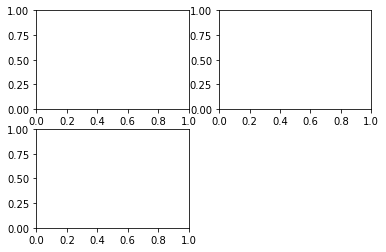

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

> 아래와 같은 명령으로 그래프를 띄우면 matplotlib은 가장 최근의 figure와 그 서브 플롯을 그린다. 
```python
plt.plot(np.random.randn(50).cumsum(), 'k--')
```

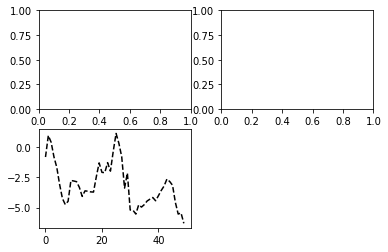

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

> 서브플롯이 없다면 서브플롯 하나를 생성한다. 이렇게 해서 `figure와 서브플롯이 생성되는 과정`을 숨겨준다.

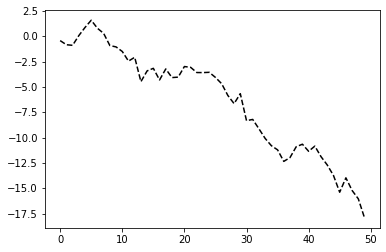

In [8]:
plt.plot(np.random.randn(50).cumsum(), 'k--')   # 'k--' 옵션은 검은 점선을 그리기 위한 스타일 옵션임.

> fig.add_subplot에서 반환되는 객체는 AxeSubplot인데, 각각의 인스턴스 메서드를 호출해서 다른 빈 서브플롯에 직접 그래프를 그릴 수 있다. 

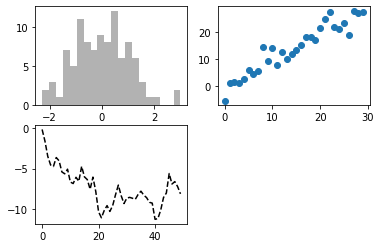

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))

> matplotlib 문서에서 여러 가지 그래프 종류를 확인할 수 있다.  
> 특정한 배치에 맞추어 여러 개의 서브플롯을 포함하는 figure를 생성하는 일은 흔히 접하게 되는 업무인데 이를 위한 plt.subplots라는 편리한 메서드가 있다.  
> - 이 메서드는 NumPy 배열과 서브플롯 객체를 새로 생성하여 반환한다.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

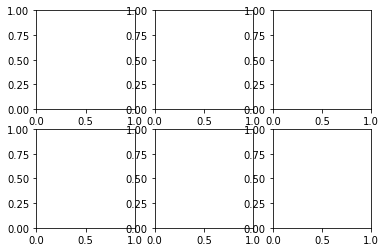

In [11]:
fig, axes = plt.subplots(2,3)
axes

> axes 배열은 axes[0, 1]처럼 2차원 배열로 쉽게 색인될 수 있어서 편리하게 사용될 수 있다.  
> 서브플롯이 같은 x축 혹은 y축을 가져야 한다면 각각 sharex와 sharey를 사용해서 지정할 수 있다. => 같은 범위 내에서 데이터를 비교해야 할 경우 특히 유용하다.  
> 별도로 지정하지 않으면 matplotlib은 각 그래프의 범위를 독립적으로 조정한다.

#### pyplot.subplots 옵션

<details>
<summary>pyplot.subplots 옵션</summary>
<div markdown="1">

|인자|설명|
|:--|:--|
|nrows|서브플롯의 로우 수|
|ncols|서브플롯의 컬럼 수|
|sharex|모든 서브플롯이 같은 x축 눈금을 사용하도록 한다(xlim 값을 조절하면 모든 서브플롯에 적용된다).|
|sharey|모든 서브플롯이 같은 y축 눈금을 사용하도록 한다(ylim 값을 조절하면 모든 서브플롯에 적용된다).|
|subplot_kw|add_subplot을 사용해서 각 서브플롯을 생성할 때 사용할 키워드를 담고 있는 사전|
|**fig_kw|figure를 생성할 때 사용할 추가적인 키워드 인자. 예를 들면 plt.subplots(2,2,figsize = (8,6))|

    
</div>
</details>

#### 서브플롯 간의 간격 조절하기

> matplotlib은 서브플롯 간에 적당한 간격과 여백을 추가해준다. 이 간격은 전체 그래프의 높이와 너비에 따라 상대적으로 결정된다.  
> 서브플롯 간의 간격은 Figure 객체의 subplots_adjust 메서드를 사용해서 쉽게 바꿀 수 있다. subplots_adjust 메서드는 최상위 함수로도 존재한다.

```python
subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = None, hspace = None)
```

> wspace와 hspace는 서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율을 조절한다.  
> 다음 코드는 서브플롯 간의 간격을 주지 않은 그래프를 생성하는 코드.

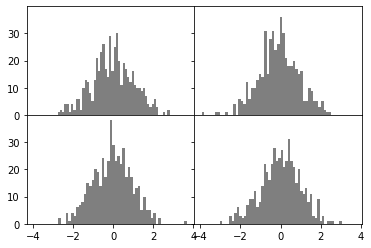

In [14]:
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True)
for i in range(2) : 
    for j in range(2) : 
        axes[i,j].hist(np.random.randn(500), bins = 50, color = 'k', alpha = 0.5)

plt.subplots_adjust(wspace = 0, hspace = 0)

> 그래프를 그렸을 때 축 이름이 겹치는 경우가 있다. matplotlib은 그래프에서 이름이 겹치는지 검사하지 않기 때문에 이와 같은 경우에는 눈금 위치와 눈금 이름을 명시적으로 직접 지정해야 한다.

### 9.1.2 색상, 마커, 선 스타일

> matplotlib에서 가장 중요한 plot 함수는 `x와 y 좌표값이 담긴 배열`과 추가적으로 `색상과 선 스타일을 나타내는 축약 문자열`을 인자로 받는다.  
> 흔히 사용되는 색상을 위해 몇 가지 색상 문자열이 존재하지만 RGB 값을 직접 지정해서 색상표에 있는 어떤 색상이라도 지정할 수 있다.  
> 마커도 스타일 문자열에 포함시킬 수 있는데 색상 다음에 마커 스타일이 오고 그 뒤에 선 스타일을 지정한다.

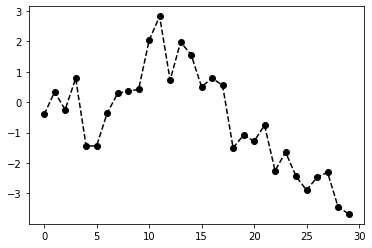

In [20]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

> 아래와 같이 표현하면 좀 더 명시적으로 표현할 수 있다.

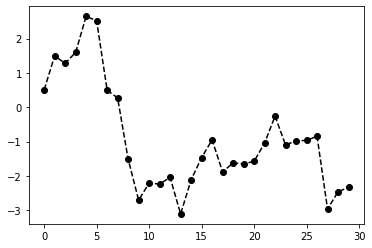

In [21]:
plt.plot(np.random.randn(30).cumsum(), color = 'k', linestyle = 'dashed', marker = 'o')

> 선그래프를 보면 일정한 간격으로 연속된 지점이 연결되어 있다. 이 역시 drawstyle 옵션을 이용해서 바꿀 수 있다.  
> 여기서는 label 인자로 plot을 전달했기 때문에 plt.legend를 이용해서 각 선그래프의 범례를 추가할 수 있다.  
> 범례를 생성하려면 그래프 그릴 대 label 옵션 지정 여부와 상관없이 `반드시 plt.legend`를 호출해야 한다. (축에 대한 범례를 추가하려면 ax.legend를 호출!)

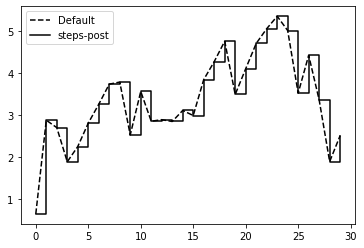

In [38]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label = 'Default')
plt.plot(data, 'k-', drawstyle = 'steps-post', label = 'steps-post')
plt.legend(loc = 'best')

### 9.1.3 눈금, 라벨, 범례

- 그래프를 꾸미는 방법은 크게 2가지가 있다.
    1. pyplot 인터페이스를 사용해서 순차적으로 꾸미는 법 (matplotlib.pyplot)
    2. matplotlib이 제공하는 API를 사용해서 좀 더 객체지향적인 방법으로 꾸미는 것.
- pyplot 인터페이스는 대화형 사용에 맞추어 설계되었으며 xlim, xticks, xticklabels 같은 메서드로 이루어져 있다. 
    - 이런 메서드로 표의 범위를 지정하거나 눈금 위치, 눈금 이름을 조절할 수 있다.
    - 아무런 인자 없이 호출하면 현재 설정되어 있는 매개변수 값을 반환한다. plt.xlim 메서드는 현재 x축의 범위를 반환한다.
    - 인자를 전달하면 매개변수의 값을 설정한다. 예를 들어 plt.xlim([0,10])을 호출하면 x축의 범위가 0부터 10까지로 설정된다.
- 이 모든 메서드는 현재 활성화된 혹은 가장 최근에 생성된 AxesSubplot 객체에 대해 동작한다.
- 위에서 소개한 모든 메서드는 서브플롯 객체의 set/get 메서드로도 존재하는데, xlim이라면 ax.get_xlim과 ax.set_xlim 메서드가 존재한다.
    - 명시적인 것을 선호하는 경우 서브플롯 인스턴스 메서드를 사용하면 좋다.

#### 제목, 축 이름, 눈금, 눈금 이름 설정하기

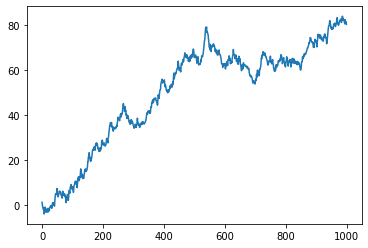

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

> x축의 눈금을 변경하기 위한 가장 쉬운 방법은 set_xticks와 set_xticklabels 메서드를 사용하는 것이다.  
> set_xticks 메서드는 전체 데이터 범위를 따라 눈금을 어디에 배치할지 지정한다. 기본적으로 이 위치에 눈금 이름이 들어간다.  
> 하지만 다른 눈금 이름을 지정하고 싶다면 set_xticklabels를 사용하면 된다.

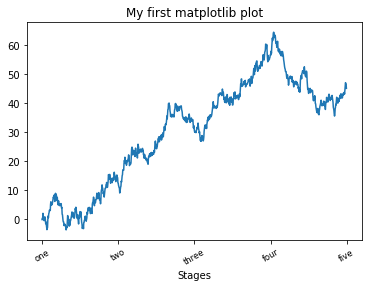

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                              rotation = 30, fontsize = 'small')
title = ax.set_title("My first matplotlib plot")
xlabel = ax.set_xlabel("Stages")

> x대신 y를 써서 같은 과정을 y축에 진행할 수 있다.  
> axes 클래스는 플롯의 속성을 설정할 수 있도록 set 메서드를 제공한다. 위 예제는 아래와 같이 작성할 수도 있다.

[Text(0.5, 1.0, 'My first matplotlib plot'), Text(0.5, 0, 'Stages')]

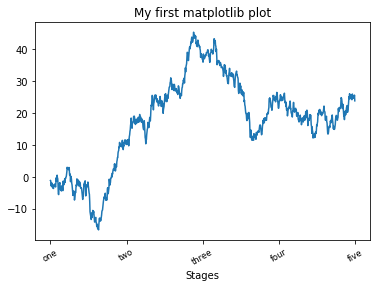

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                              rotation = 30, fontsize = 'small')

props = {
    'title' : 'My first matplotlib plot',
    'xlabel' : 'Stages',
}

ax.set(**props)

#### 범례 추가하기

> 범례를 추가하는 몇 가지 방법이 있는데 가장 쉬운 방법은 각 그래프에 label 인자를 넘기는 것이다.  
> 이렇게 하면 ax.legend()나 plt.legend()를 실행했을 대 자동으로 범례가 생성된다.  
> 범례에서 제외하고 싶은 요소가 있다면 label 인자를 넘기지 않거나 label = '_nolegend_' 옵션을 사용하면 된다.

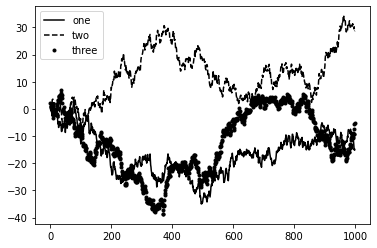

In [68]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)

ax.plot(np.random.randn(1000).cumsum(), 'k', label = 'one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label = 'two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label = 'three')

ax.legend(loc = 'best')

### 9.1.4 주석과 그림 추가하기
- 자신만의 주석을 그리고 싶은 경우 text, arrow, annotate 함수를 이용해서 추가할 수 있다.

> text 함수는 그래프 내의 주어진 좌표 (x, y)에 부가적인 스타일로 글자를 그려준다.

```python
ax.text(x,y, "Hello world!", family = "monospace", fontsize = 10)
```

> 주석은 글자와 화살표를 함께 써써 그릴 수 있다.  
> 야후! 파이낸스에서 얻은 S&P 500 지수 데이터로 그래프를 생성하고 중요한 날짜를 주석으로 추가해보자.

In [6]:
import pandas as pd

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

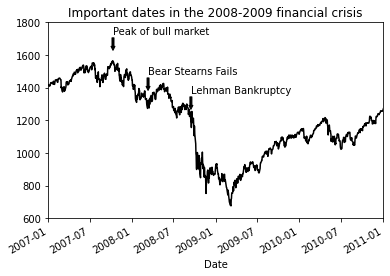

In [18]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates = True)
spx = data['SPX']

spx.plot(ax = ax, style = "k-")

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data :
    ax.annotate(label,                                                     # ax.annotate 메서드를 통해 x,y좌표로 지정한 위치에 라벨을 추가
                xy = (date, spx.asof(date) + 75),
                xytext = (date, spx.asof(date) + 225),
                arrowprops = dict(facecolor = "black",
                                  headwidth = 4,
                                  width = 2,
                                  headlength = 4),
                horizontalalignment = "left", verticalalignment = 'top')
    
# 2007-2010 구간으로 확대
ax.set_xlim(['1/1/2007', '1/1/2011'])                                       # set_xlim, set_ylim 메서드를 이용해 그래프의 시작과 끝 경계를 직접 지정.
ax.set_ylim([600,1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")           # set_title 메서드로 그래프의 제목을 지정
    
    

> 도형을 그리려면 좀 더 신경을 써야한다.  
> matplotlib은 일반적인 도형을 표현하기 위한 patches라는 객체를 제공한다.  
> 그중 Rectangle과 Circle 같은 것은 matplotlib.pyplot에서도 찾을수 있지만 전체 모음은 `matplotlib.patches`에 있다.  
> 그래프에 도형을 추가하려면 patches 객체인 shp를 만들고 서브플롯에 `ax.add_patch(shp)`를 호출한다.

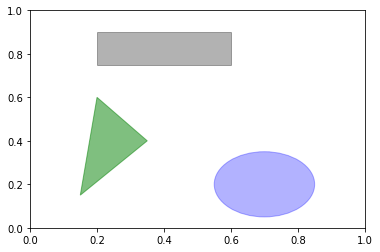

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color = 'k', alpha = 0.3)
circ = plt.Circle((0.7,0.2), 0.15, color ='b', alpha = 0.3)
pgon = plt.Polygon([[0.15,0.15], [0.35, 0.4], [0.2, 0.6]],
                   color = 'g', alpha =0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.5 그래프를 파일로 저장하기

- 활성화된 figure는 plt.savefig 메서드를 이용해서 파일로 저장할 수 있다.  
- 이 메서드는 figure 객체의 인스턴스 메서드인 savefig와 동일함.  

> figure를 SVG 포맷으로 저장하려면 다음처럼 하면 된다.
```python
plt.savefig('figpath.svg') 
```

-  몇 가지 중요한 옵션은 dpi와 bbox_inches다.  
-  dpi는 인치당 도트 해상도를 조절하고 bbox_inches는 실제 figure 둘레의 공백을 잘라낸다.

> 그래프 간 최소 공백을 가지는 400DPI짜리 PNG 파일을 만들려면 아래와 같이 입력한다.
```python
plt.savefig('figpath.png', dpi = 400, bbox_inches = 'tight')
```

> savefig 메서드는 파일에 저장할 뿐만 아니라 BytesIO처럼 파일과 유사한 `객체에 저장`하는 것도 가능하다.
```python
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```

#### Figure.savefig 옵션

<details>
<summary>Figure.savefig 옵션</summary>
<div markdown="1">

|인자|설명|
|:--|:--|
|fname|파일 경로나 파이썬의 파일과 유사한 객체를 나타내는 문자열. 저장되는 포맷은 파일 확장자를 통해 결정된다. 예를 들어 .pdf는 PDF포맷, .png는 PNG 포맷|
|dpi|figure의 인치당 도트 해상도. 기본값은 100이며, 설정 가능하다.|
|facecolor, edgecolor| 서브플롯 바깥 배경 색상. 기본값은 'w' (흰색)다.|
|format|명시적인 파일 포맷('png', 'pdf', 'svg', 'ps',' 'eps' ...)
|bbox_inches|figure에서 저장할 부분. 만약 'tight'를 지정하면 figure 둘레의 비어 있는 공간을 모두 제거한다.|

    
</div>
</details>

### 9.1.6 matplotlib 설정
- matplotlib은 출판물용 그래프를 만드는 데 손색이 없는 기본 설정과 색상 스키마를 함께 제공.
- 거의 모든 기본 동작은 많은 전역 인자를 통해 설정 가능. 아래와 같은 것들 설정 가능.
    - 그래프 크기
    - 서브플롯 간격
    - 색상
    - 글자 크기
    - 격자 스타일
- matplotlib의 환경 설정 시스템은 두 가지 방법으로 다룰 수 있다.
    1. rc메서드를 사용해서 프로그래밍적으로 설정하는 방법.
        - 예를 들어 figure 크기를 10 X 10으로 전역 설정해두고 싶다면 다음 코드를 실행하면 된다.
        > ```python 
          plt.rc('figure', figsize = (10,10)) 
           ```
        - rc 메서드에서 첫 번째 인자는 설정하고자 하는 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend' 및 다른 컴포넌트의 이름이다. 그다음으로 설정할 값에 대한 키워드 인자를 넘기게 된다.
        - 이 옵션을 쉽게 작성하려면 파이썬의 사전 타입을 사용한다.
        > ```python
            font_options = {'family' : 'monospace',
                            'weight' : 'bold',
                            'size' : 'small'}
            plt.rc('font', **font_options) 
            ```
    2. 더 많은 설정과 옵션의 종류는 matplotlib/mpl-data 디렉터리에 matplotlibrc라는 파일에 저장되어 있다.
        - 만약 이 파일을 적절히 수정해서 사용자 홈 디렉터리에 .matplotlibrc라는 이름으로 저장해두면 matplotlib을 사용할 때마다 불러오게 된다.

## 9.2 pandas에서 seaborn으로 그래프 그리기

- pandas는 Series와 DataFrame 객체를 간단하게 시각화할 수 있는 내장 메서드를 제공한다.  
- 다른 라이브러리로는 마이클 와스콤 (Michael Waskom)이 만든 통계 그래픽 라이브러리인 seaborn이 있다.
- seaborn은 흔히 사용하는 다양한 시각화 패턴을 쉽게 구현할 수 있도록 도와준다.

> seaborn 라이브러리를 임포트하면 더 나은 가독성과 미려함을 위해 matplotlib의 기본 컬러 스킴과 플롯 스타일을 변경한다.  
> 일부 독자는 seaborn API를 사용하지 않더라도 일반적인 matplotlib 그래프의 스타일을 개선하기 위한 간편한 방법으로 seaborn 라이브러리를 임포트하기도 한다.

### 9.2.1 선그래프

> Sereis와 DataFrame은 둘 다 plot 메서드를 이용해 다양한 형태의 그래프를 생성할 수 있다. 기본적으로 plot 메서드는 선그래프를 생성한다.  
> Series 객체의 색인은 matplotlib에서 그래프를 생성할 때 x축으로 해석되며 use_index = False 옵션을 넘겨서 색인을 그래프의 축으로 사용하는 것을 막을 수 있다.  
> x축의 눈금과 한계는 xticks와 xlim 옵션으로 조절할 수 있다.  
> y축 역시 yticks와 ylim 옵션으로 조절할 수 있다.

<AxesSubplot:>

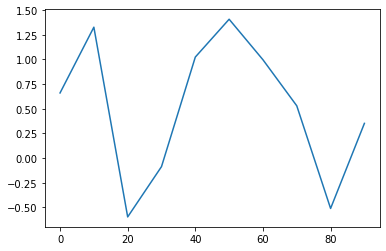

In [21]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0,100,10))
s.plot()

> 대부분의 pandas 그래프 메서드는 부수적으로 ax 인자를 받는데, 이 인자는 matplotlib의 서브플롯 객체가 될 수 있다.  
> 이를 이용해 그리드 배열 상에서 서브플롯의 위치를 좀 더 유연하게 가져갈 수 있다.  

> DataFrame의 plot 메서드는 하나의 서브플롯 안에 각 컬럼별로 선그래프를 그리고 자동적으로 범례를 생성한다.  
> plot 속성에는 다양한 종류의 그래프 패밀리가 존재한다. 예를 들어 df.plot()은 df.plot.line()과 동일하다.

<AxesSubplot:>

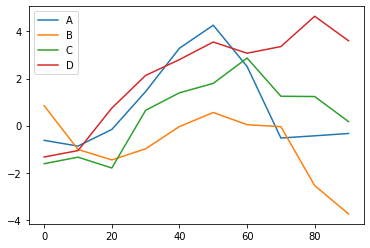

In [27]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                  columns = list('ABCD'),
                  index = np.arange(0, 100, 10))
df.plot()

#### Series.plot 메서드 인자

<details>
<summary>Series.plot 메서드 인자</summary>
<div markdown="1">

|인자|설명|
|:--|:--|
|label|그래프의 범례 이름|
|ax|그래프를 그릴 matplotlib의 서브플롯 객체. 만약 아무것도 넘어오지 않으면 현재 활성화되어 있는 matplotlib의 서브플롯을 사용한다.|
|style|matplotlib에 전달할 'ko--'같은 스타일 문자열|
|alpha|그래프 투명도 (0부터 1까지)|
|kind|그래프 종류. 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'|
|logy|y축에 대한 로그 스케일링|
|use_index|객체의 색인을 눈금 이름으로 사용할지 여부|
|rot|눈금 이름을 로테이션 (0부터 360까지)|
|xticks|x축으로 사용할 값|    
|yticks|y축으로 사용할 값|
|xlim|x축 한계 (예:[0,10])|
|ylim|y축 한계|
|grid|축의 그리드를 표시할지 여부(기본값은 켜기)|
    
</div>
</details>

#### DataFrame의 plot 메서드 인자

<details>
<summary>DataFrame의 plot 메서드 인자</summary>
<div markdown="1">

|인자|설명|
|:--|:--|
|subplots|각 DataFrame의 컬럼을 독립된 서브플롯에 그린다.|
|sharex|subplots = True인 경우 같은 x축을 공유하고 눈금과 한계를 연결한다.|
|sharey|subplots = True인 경우 같은 y축을 공유한다.|    
|figsize|생성될 그래프의 크기를 튜플로 지정한다.|
|title|그래프의 제목을 문자열로 지정한다.|
|legend|서브플롯의 범례를 추가한다 (기본값은 True).|
|sort_columns|컬럼을 알파벳 순서로 그린다. 기본값은 존재하는 컬럼 순서|   
    
</div>
</details>

### 9.2.2 막대그래프

> plot.bar()와 plot.barh()는 각각 수직막대그래프와 수평막대그래프를 그린다.  
> 이 경우 Series 또는 DataFrame의 색인은 수직막대그래프(bar)인 경우 x 눈금, 수평막대그래프 (barh)인 경우 y 눈금으로 사용된다.

<AxesSubplot:>

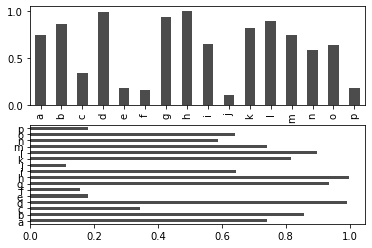

In [37]:
fig, axes = plt.subplots(2,1)

data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color = 'k', alpha = 0.7)
data.plot.barh(ax=axes[1], color = 'k', alpha = 0.7)

> 막대그래프를 그릴 때 유용한 방법은 Series의 value_counts 메서드 (s.value_counts().plot.bar())를 이용해서 값의 빈도를 그리는 것이다.

> DataFrame에서 막대그래프는 각 로우의 값을 함께 묶어서 하나의 그룹마다 각각의 막대를 보여준다.

In [71]:
df = pd.DataFrame(np.random.randn(6,4),
                  index = ['one', 'two', 'three', 'four', 'five', 'six'],
                  columns = pd.Index(['A','B','C','D'], name = 'Genus'))
df

Genus,A,B,C,D
one,-0.587135,-0.070372,2.570903,2.517134
two,-0.151581,-0.465467,-0.586242,-0.027806
three,-1.250334,1.657771,0.607076,0.364879
four,-1.014272,-0.628026,0.676475,0.490627
five,-1.528928,-0.312977,-0.942767,-0.845545
six,0.235131,0.240335,0.602091,-1.455648


<AxesSubplot:>

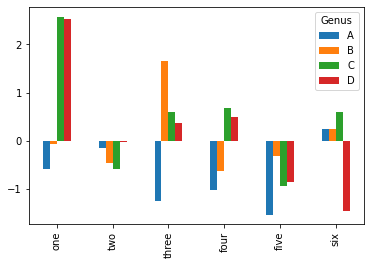

In [72]:
df.plot.bar()

> 누적막대그래프는 stacked=True 옵션을 사용해서 생성할 수 있는데, 각 로우의 값들이 하나의 막대에 누적되어 출력된다.

<AxesSubplot:>

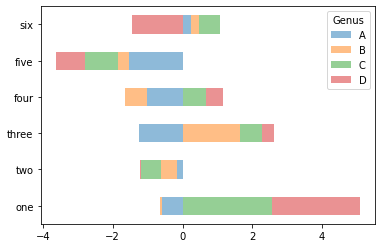

In [73]:
df.plot.barh(stacked=True, alpha = 0.5)

> 책의 앞에서 살펴봤던 팁 데이터를 다시 살펴보자.  
> 이 데이터에서 요일별 파티 숫자를 뽑고 파티 숫자 대비 팁 비율을 보여주는 막대그래프를 그려보자.  

In [75]:
tips = pd.read_csv("examples/tips.csv")

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [78]:
# 1인과 6인 파티는 제외
party_counts = party_counts.loc[:, 2:5]

# 합이 1이 되도록 정규화
party_pcts = party_counts.div(party_counts.sum(1), axis = 0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

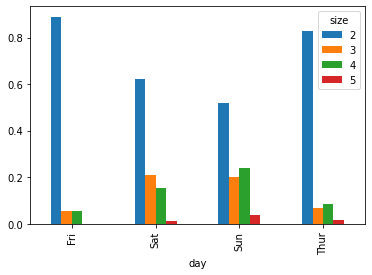

In [82]:
party_pcts.plot.bar()

> 그래프를 그리기 전에 요약을 해야하는 데이터는 seaborn 패키지를 이용하면 훨씬 간단하게 처리할 수 있다. 

In [83]:
import seaborn as sns

tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

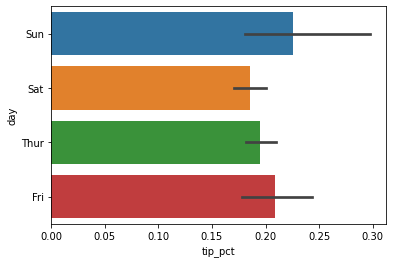

In [87]:
sns.barplot(x = 'tip_pct', y = 'day', data = tips, orient = 'h')

> seaborn.barplot 메서드의 hue 옵션을 이용하면 추가 분류에 따라 나눠 그릴 수 있다.

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

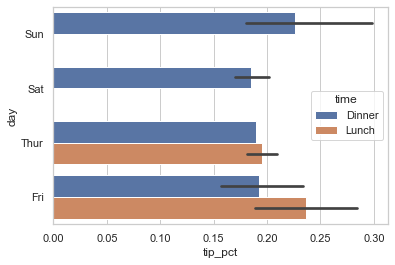

In [90]:
sns.barplot(x = 'tip_pct', y = 'day', hue = 'time', data = tips, orient = 'h')

> seaborn 라이브러리는 자동으로 기본 색상 팔레트, 그래프 배경, 그리드 선 색상 같은 꾸밈새를 변경한다.  
> seaborn.set 메서드를 이용해서 이런 꾸밈새를 변경할 수 있다.

In [89]:
sns.set(style = 'whitegrid')

### 9.2.3 히스토그램과 밀도 그래프

- 히스토그램은 막대그래프의 한 종류로, 값들의 빈도를 분리해서 보여준다.  
- 데이터 포인트는 분리되어 고른 간격의 막대로 표현되며 데이터의 숫자가 막대의 높이로 표현된다.

<AxesSubplot:ylabel='Frequency'>

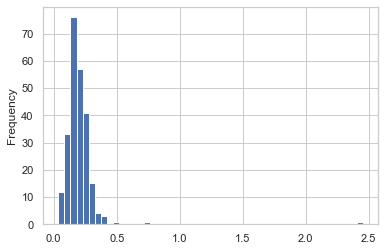

In [91]:
tips['tip_pct'].plot.hist(bins= 50)

> 이와 관련되어 밀도 그래프는 관찰값을 사용해서 추정되는 연속된 확률 분포를 그린다.  
> 일반적인 과정은 kernel 메서드를 잘 섞어서 이 분포를 근사하는 방법인데 이보다 단순한 정규 분포이다.  
> 그래서 밀도그래프는 KDE (Kernel Density Estimate) 그래프라고도 알려져 있다.

<AxesSubplot:ylabel='Density'>

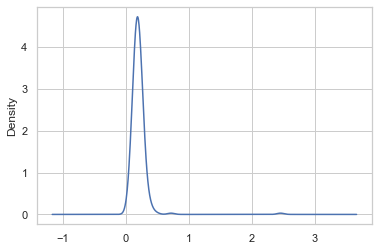

In [92]:
tips['tip_pct'].plot.density()

> seaborn 라이브러리의 distplot 메서드를 이용해서 히스토그램과 밀도 그래프를 한 번에 손 쉽게 그릴 수 있다.  
> 예를 들어 두 개의 다른 표준정규분포로 이루어진 양봉분포 (bimodal distribution)을 생각해보자.

C:\Users\gusdn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

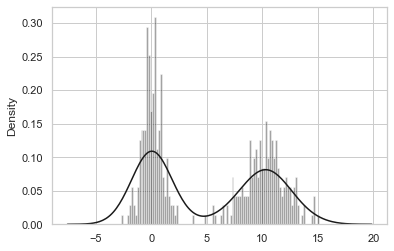

In [99]:
comp1 = np.random.normal(0,1,size = 200)
comp2 = np.random.normal(10,2, size = 200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins = 100, color = 'k')

### 9.2.4 산포도

> 산포도는 두 개의 1차원 데이터 묶음 간의 관계를 나타내고자 할 때 유용한 그래프다.  
> statsmodels 프로젝트에서 macrodata 데이터 묶음을 불러온 다음 몇 가지 변수를 선택하고 로그차를 구해보자.

In [101]:
macro = pd.read_csv('examples/macrodata.csv')

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

trans_data = np.log(data).diff().dropna()

trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


> seaborn 라이브러리의 regplot 메서드를 이용해서 산포도와 선형회귀곡선을 함께 그릴 수 있다.

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

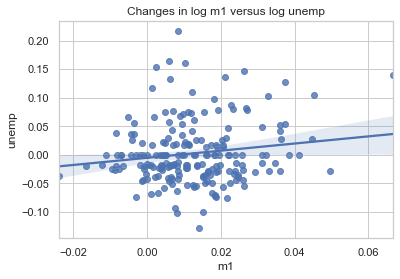

In [104]:
sns.regplot(x = 'm1', y= 'unemp', data = trans_data)

plt.title("Changes in log %s versus log %s" %('m1','unemp'))

> seaborn에서는 pairplot 함수를 제공하여 대각선을 다라 각 변수에 대한 히스토그램이나 밀도 그래프도 생성할 수 있다.  
> plot_kws 인자는 각각의 그래프에 전달할 개별 설정값을 지정한다. 설정 옵션에 관한 자세한 내용은 `seaborn.pairplot` 문서를 참고!

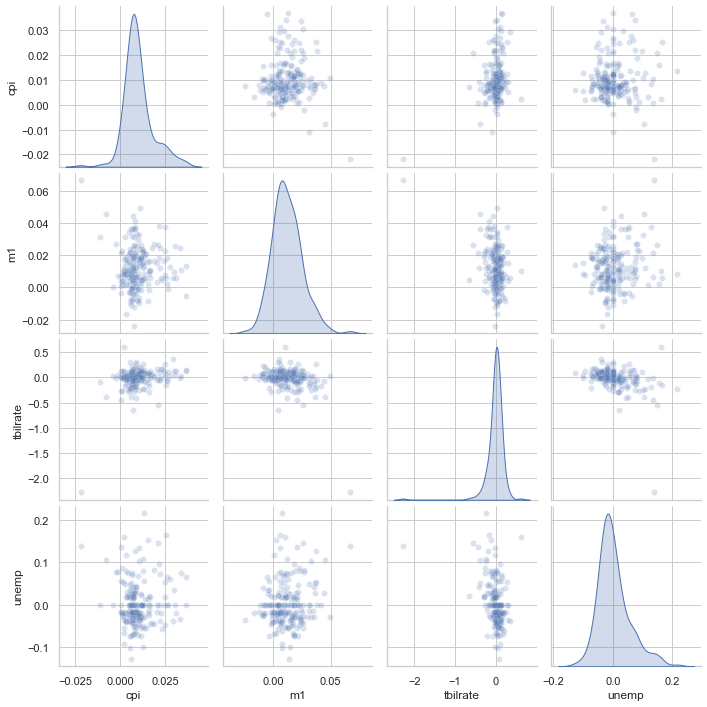

In [105]:
sns.pairplot(trans_data, diag_kind = 'kde', plot_kws = {"alpha" : 0.2})

### 9.2.5 패싯 그리드와 범주형 데이터

- 다양한 범주형 값을 가지는 데이터를 시각화하는 한 가지 방법은 `패싯 그리드`를 이용하는 것.
- seaborn은 factorplot이라는 유용한 내장 함수를 제공하여 다양한 면을 나타내는 그래프를 쉽게 그릴 수 있게 도와준다.

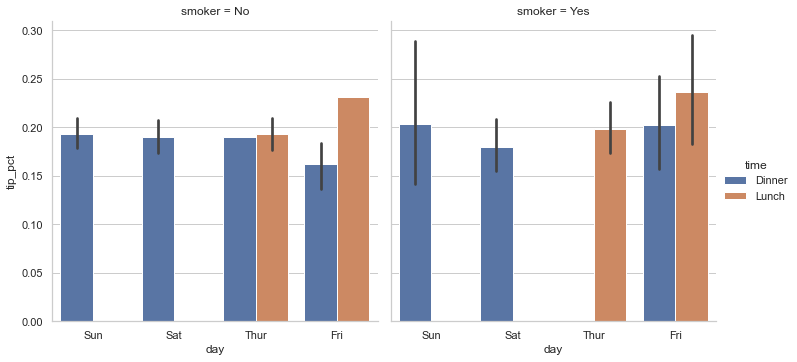

In [110]:
sns.catplot(x = 'day', y = 'tip_pct', hue = 'time', col = 'smoker',
               kind = 'bar', data = tips[tips.tip_pct < 1])

> 'time'으로 그룹을 만드는 대신 패싯 안에서 막대그래프의 색상을 달리해서 보여줄 수 있다.  
> 또한 패싯 그리드에 time 값에 따른 그래프를 추가할 수도 있다.

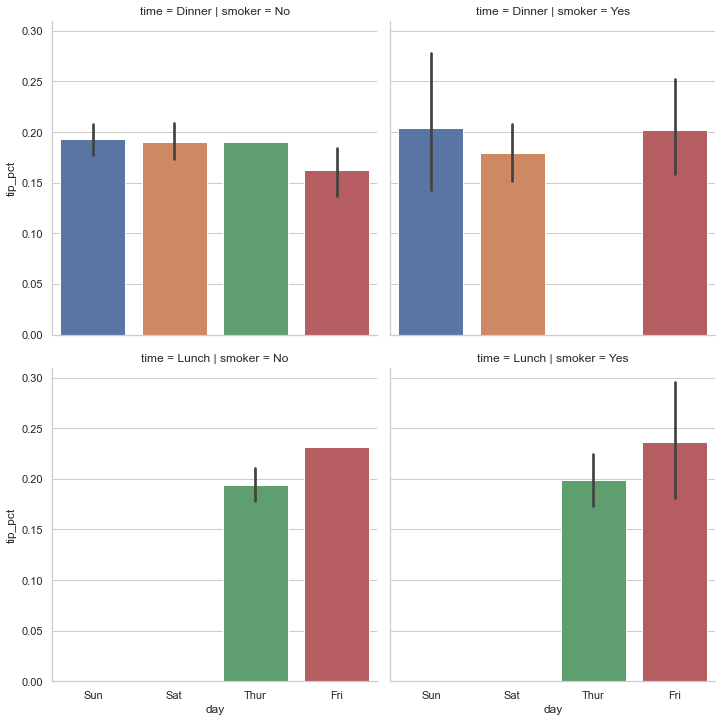

In [111]:
sns.catplot(x = 'day', y = 'tip_pct', row = 'time',
            col = 'smoker', 
            kind = 'bar', data = tips[tips.tip_pct < 1])

> catplot은 보여주고자 하는 목적에 어울리는 다른 종류의 그래프도 함께 지원한다.  
> 예를 들어 중간값과 사분위 그리고 특잇값을 보여주는 상자그림이 효과적인 시각화 방법일 수도 있다.

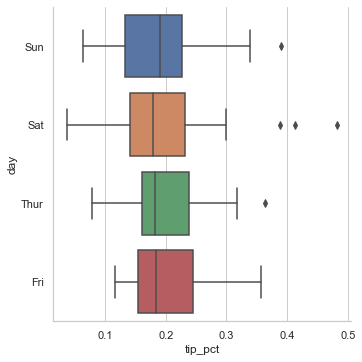

In [112]:
sns.catplot(x = 'tip_pct', y = 'day', kind = 'box', 
            data = tips[tips.tip_pct < 0.5])

> 일반적인 용도의 seaborn.FacetGrid 클래스를 이용해서 나만의 패싯 그리드를 만들고 원하는 그래프를 그릴 수도 있다.   
> 자세한 내용은 seaborn 문서 참고!

## 9.3 다른 파이썬 시각화 도구

- 웹을 위한 대화형 그래픽 도구 개발 
    - Bokeh (보케)
    - plotly (플로틀리)